# CLAHE

In [2]:
# Image: https://unsplash.com/photos/AjmBvSj_2IE

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from os import listdir

In [2]:
PATH = "input"
import glob
from PIL import Image

In [3]:
def plot_hist(orig_img, enh_img, hist=False, save=False, fname=None):
    '''
    A function to display original and enhanced images.


    Args:

    origin_img : input image
    enh_img : MSRCR output  
    save : FALSE(default); Set it to TRUE to save the output to assets.
    '''
    if hist :
        fig, ax = plt.subplots(2,2, figsize=(20,15))

        ax[0,0].imshow(orig_img)
        ax[0,0].set_xticks([])
        ax[0,0].set_yticks([])
        ax[0,0].set_title('Original',fontsize=25)
        ax[1,0].hist(orig_img.ravel(),256,[0,256])

        ax[0,1].imshow(enh_img)
        ax[0,1].set_xticks([])
        ax[0,1].set_yticks([])
        ax[0,1].set_title('Enhanced',fontsize=25)
        ax[1,1].hist(enh_img.ravel(),256,[0,256])

        fig.suptitle('Multi-scale retinex  with color restoration', fontsize=30, y=1.05)
        fig.tight_layout()

    else :
        fig, ax = plt.subplots(1,2, figsize=(15,8))

        ax[0].imshow(orig_img)
        ax[0].set_xticks([])
        ax[0].set_yticks([])
        ax[0].set_title('Original',fontsize=25)
        ax[1].imshow(enh_img)
        ax[1].set_xticks([])
        ax[1].set_yticks([])
        ax[1].set_title('Enhanced',fontsize=25)

        fig.suptitle('CLAHE with Image Contrast Enhancement', fontsize=30, y=1.05)
        fig.tight_layout()

    
    if save:
        if fname is not None:
            save_file = os.path.join('assets', fname) 
            plt.savefig(save_file,bbox_inches='tight',dpi=72)
            plt.close(fig)

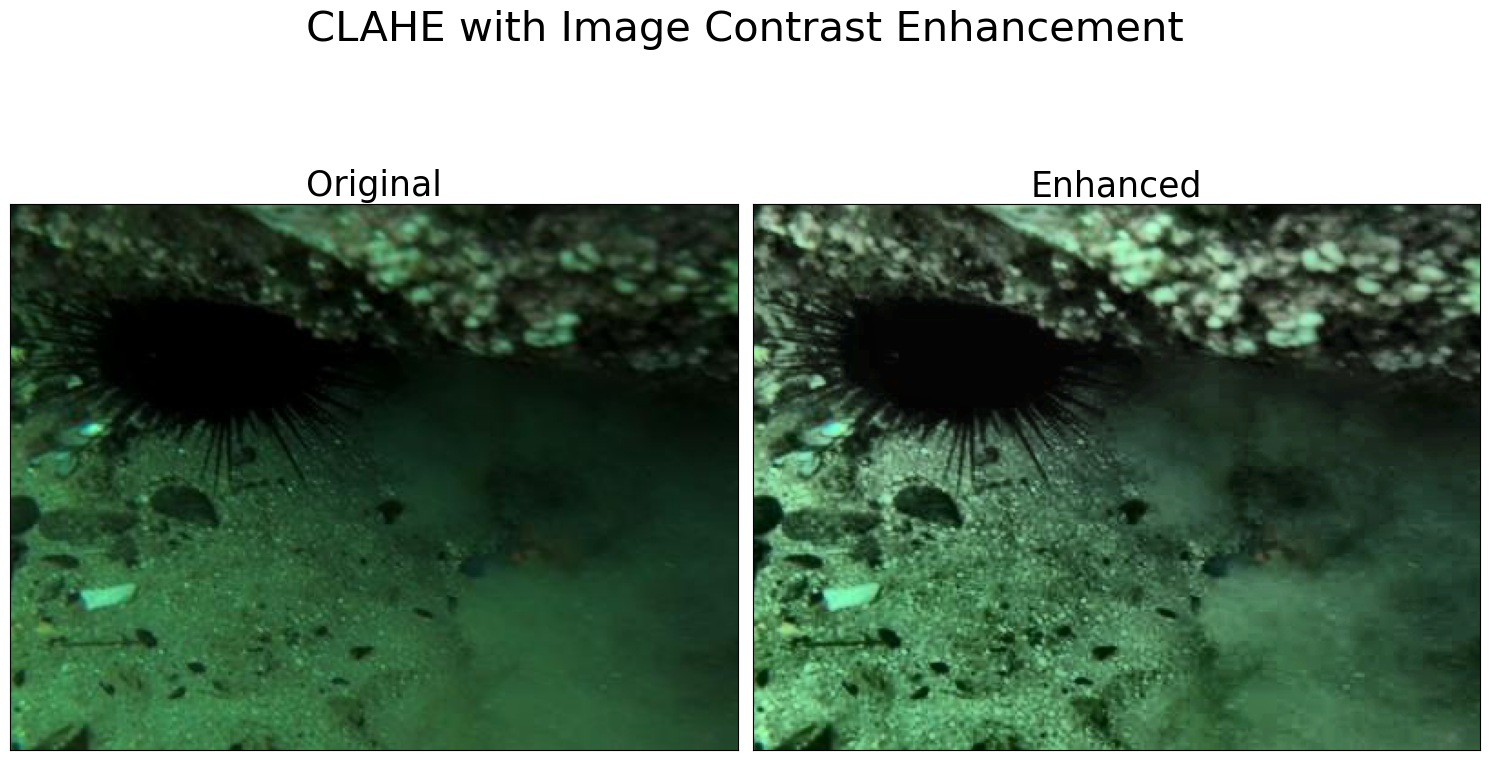

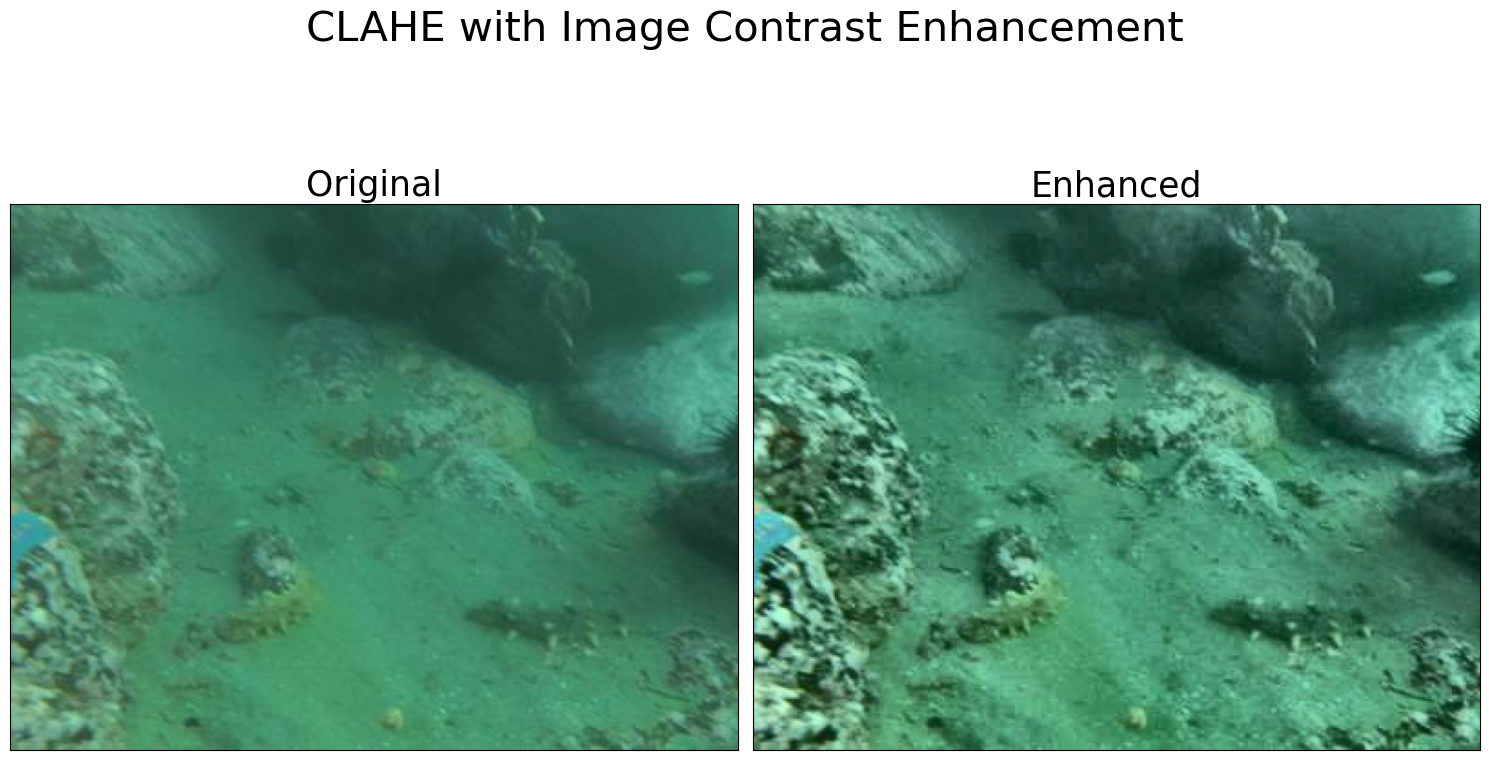

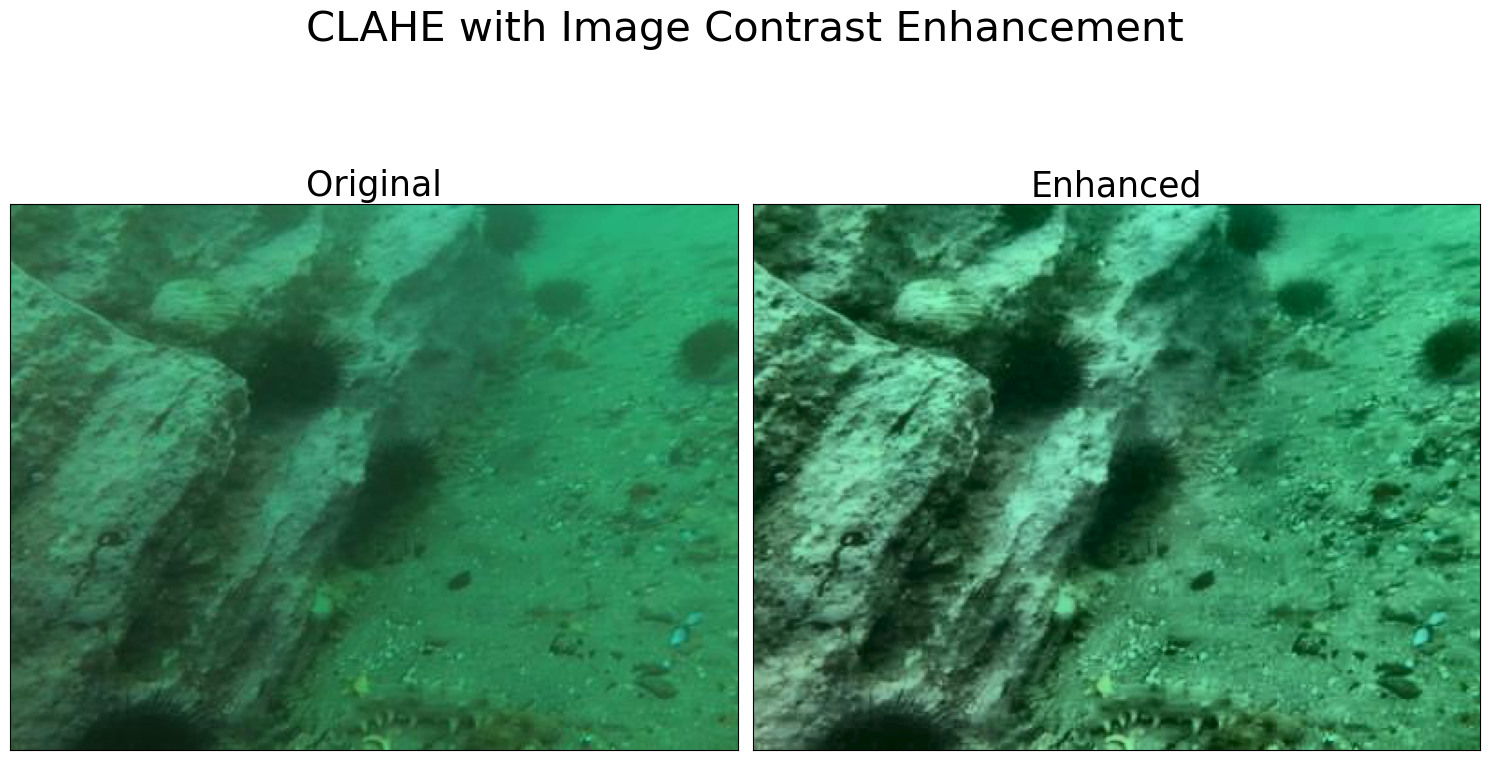

In [4]:
images = glob.glob("input/*.jpg")

for image in images:
    with open(image , "rb") as file:
        img = np.array(Image.open(file))

        hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)
    
        l_channel, a_channel, b_channel = cv2.split(hsv_img)

        clahe = cv2.createCLAHE(clipLimit = 2.0 , tileGridSize=(8,8))
        
        # Apply CLAHE to the L channel
        clahe_l = clahe.apply(l_channel)
    
        # Merge the CLAHE enhanced L channel with the original A and B channel
        enhanced_lab = cv2.merge([clahe_l, a_channel, b_channel])
    
        # Convert back to BGR
        clahe_img_colored = cv2.cvtColor(enhanced_lab, cv2.COLOR_Lab2BGR)
        
        # plot
        plot_hist(img , clahe_img_colored, hist=False)
        